
# Rede Neural Multicamada (MLP) com Keras/TensorFlow

Neste notebook, vamos colocar em prática os conceitos vistos na **Aula Teórica: Desvendando as Redes Neurais: Como elas Aprendem?**

Você aprenderá:
- Como construir uma rede neural **multicamada (MLP)** usando Keras/TensorFlow
- Como os **neurônios artificiais** se conectam em camadas
- Como o modelo **aprende ajustando os pesos** automaticamente
- Como usar uma rede neural para resolver um problema de classificação simples



## 1. Conexão com a Teoria

Na aula teórica, vimos que:
- Redes neurais são formadas por **neurônios artificiais interconectados**
- Cada conexão tem um **peso**
- O aprendizado ocorre quando os **pesos são ajustados**
- A função de ativação permite que a rede aprenda **relações não lineares**
- O **backpropagation** é o processo de ajuste automático dos pesos

Agora vamos ver isso em ação com uma biblioteca que já implementa todos esses mecanismos para nós: **Keras/TensorFlow**.



## 2. Importando bibliotecas


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras



## 3. Criando um conjunto de dados simples

Vamos usar um dataset sintético chamado **Moons** (duas meias-luas).  
É um problema clássico para mostrar como uma rede neural pode aprender limites de decisão não lineares.


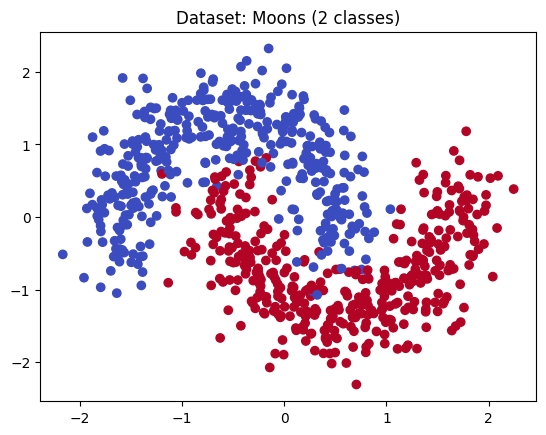

In [2]:

# Gerar dados (duas meias-luas)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualizar
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Dataset: Moons (2 classes)")
plt.show()



## 4. Construindo a Rede Neural Multicamada

Nossa rede terá:
- Camada de entrada: 2 neurônios (x1, x2)
- Camada oculta: 10 neurônios, função de ativação **ReLU**
- Camada de saída: 1 neurônio, função de ativação **sigmóide** (saída entre 0 e 1)

👉 Essa estrutura corresponde à ideia de **camadas interconectadas** da aula teórica.


In [3]:

model = keras.models.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=(2,)),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)


## 5. Treinando a Rede Neural

Durante o treinamento:
- O modelo faz previsões
- Calcula o erro (função de perda)
- Ajusta os **pesos** automaticamente com **backpropagation** e **otimizador (Adam)**

Vamos treinar por 50 épocas.


In [4]:

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1685 - loss: 1.0314 - val_accuracy: 0.2500 - val_loss: 0.9330
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1879 - loss: 0.9302 - val_accuracy: 0.5000 - val_loss: 0.8601
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5113 - loss: 0.8425 - val_accuracy: 0.5050 - val_loss: 0.7949
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5240 - loss: 0.7677 - val_accuracy: 0.4950 - val_loss: 0.7368
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4752 - loss: 0.7266 - val_accuracy: 0.4800 - val_loss: 0.6852
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4876 - loss: 0.6634 - val_accuracy: 0.4450 - val_loss: 0.6399
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4936 - loss: 0.6254 - val_accuracy: 0.5750 - val_loss: 0.5990
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.5791 - val_accuracy: 0.7750 - val_loss


## 6. Curvas de Aprendizado

Podemos visualizar como a **perda (loss)** diminui e a **acurácia (accuracy)** aumenta ao longo das épocas.


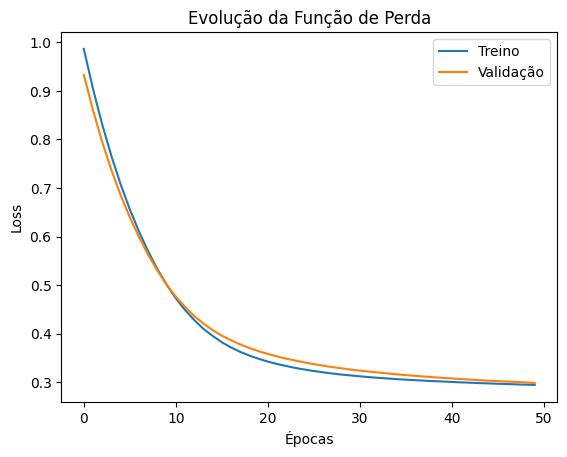

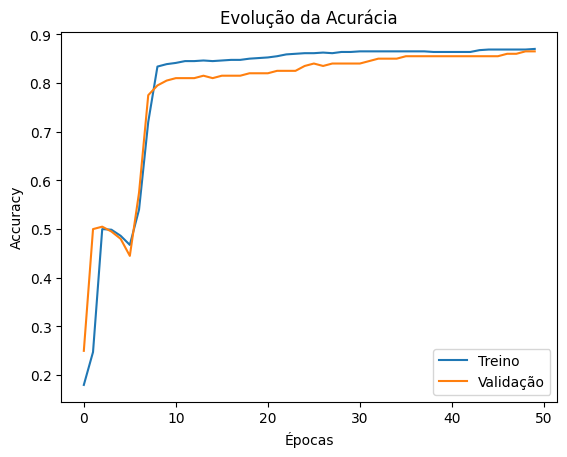

In [5]:

plt.plot(history.history["loss"], label="Treino")
plt.plot(history.history["val_loss"], label="Validação")
plt.title("Evolução da Função de Perda")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Treino")
plt.plot(history.history["val_accuracy"], label="Validação")
plt.title("Evolução da Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



## 7. Avaliação Final

Vamos medir a acurácia da rede nos dados de teste.


In [6]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8776 - loss: 0.2796 
Acurácia no conjunto de teste: 86.50%



## 8. Visualizando a Fronteira de Decisão

Uma das formas mais didáticas de entender uma rede neural é visualizar **como ela separa as classes no espaço**.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


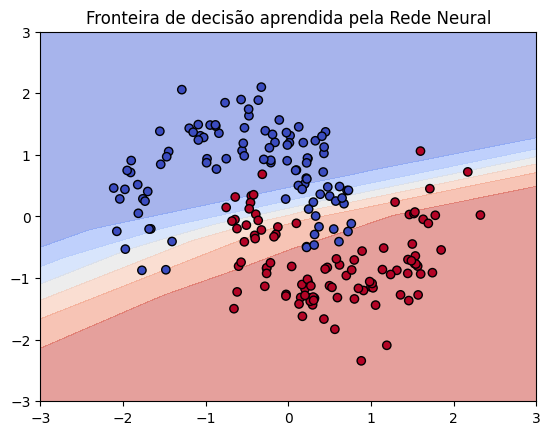

In [7]:

# Gerar grade de pontos
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid = scaler.transform(grid)

# Previsões da rede
probs = model.predict(grid).reshape(xx.shape)

# Plotar
plt.contourf(xx, yy, probs, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolors="k")
plt.title("Fronteira de decisão aprendida pela Rede Neural")
plt.show()



## 9. Conclusão

Neste exercício prático, vimos que:
- A rede neural multicamada (MLP) consegue aprender **padrões complexos** nos dados
- As conexões entre neurônios (pesos) são ajustadas automaticamente durante o treino
- Funções de ativação permitem resolver problemas **não lineares**
- O **backpropagation** é usado nos bastidores para atualizar os pesos
